<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

RANDOM_STATE = 12345

In [2]:
def study(data): 
    info = display(data.head(10)), data.info(), display(data.describe())

In [3]:
#Загружаем данные

data = pd.read_csv('/datasets/insurance.csv')

In [4]:
study(data)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
#Посмотрим уникальные значения

data['Возраст'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

Можем заметить, что данные в столбце **Возраст** являются целочисленными, изменим тип данных.

In [6]:
data['Возраст'] = pd.to_numeric(data['Возраст'], downcast='integer')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   int8   
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(1), int64(3), int8(1)
memory usage: 161.3 KB


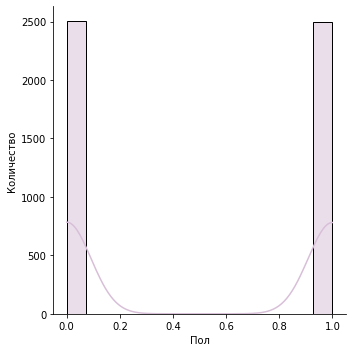

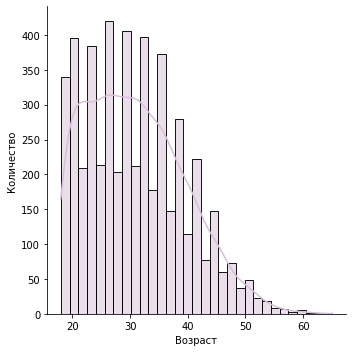

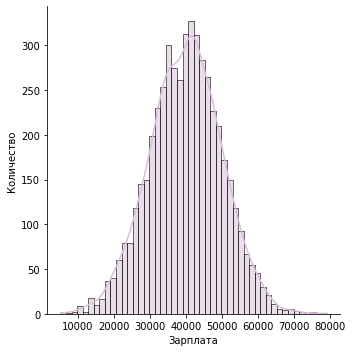

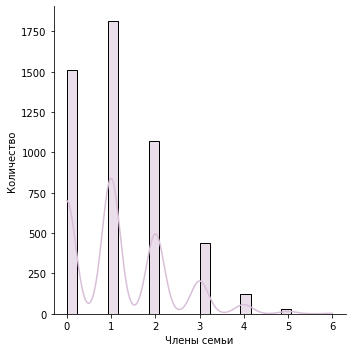

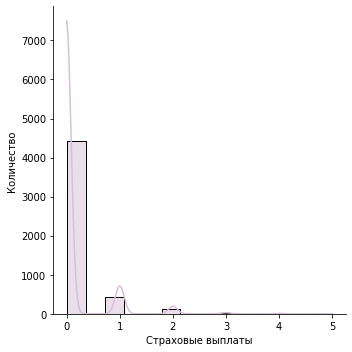

In [7]:
for i in data.columns:
    sns.displot(data[i], kind='hist', color='#D8BFD8', kde=True)
    plt.ylabel('Количество')
plt.show();

# Вывод

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

Визуально выбросов нет, пропуски также отсутствуют. Можем заметить, что мужчин и женщин приблизительно равное количество. Большиснство людей находятся в возрасте от 20 до 35 лет и имеют заработную плату около 45 тысяч. Они либо одиноки, либо имеют пару, но без детей. Страховые выплаты редкость, но можем заметить, что была ситуация, когда на одного человека приходилось 5 выплат.  

Изменили тип данных в столбце **Возраст**. 

Данные изучены и подготовлены для дальнейшей работы. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество не изменится

**Обоснование:**

Обозначим новую матрицу признаков $X_1$ как произведение старой $X$ на матрицу $P$(обратимую):
$$X_1 = XP$$

Получившеся значение $X_1$ подставим в формулу для расчета $w_1$:
$$w_1=((XP)^TXP)^{−1}(XP)^Ty$$

Раскроем скобки произведения $(XP)^T$, по правилам каждая матрица возводится в степень $T$:
    $$w_1=(P^TX^TXP)^{-1}P^TX^Ty$$

Постепенно будем раскрывать скобки и возводить в степень:
 $$w_1=([P^TX^TX]P)^{-1}P^TX^Ty$$
 
  $$w_1=P^{-1}[P^T(X^TX)])^{-1}P^TX^Ty$$

$$w_1=P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$

Так как $P$ обратимая, то произведение  $(P^T)^{−1}P^T$ равно $E$(единичная матрица). Перегруппируем множители для наглядности и произведем замену:
$$w_1=P^{-1}(X^TX)^{-1}EX^Ty=P^{-1}(X^TX)^{-1}X^Ty$$

Обратим внимание, что можем произвести еще одну замену на $w = (X^T X)^{-1} X^T y$:
$$w_1=P^{-1}(X^TX)^{-1}X^Ty=P^{-1}w$$ 
(здесь мы видим связь параметров $w$ и $w_1$).

Предсказания модели расчитываются по формуле:
$$a=Xw$$

Подставим в эту формулу значения $X_1 = XP$ и $w_1=P^{-1}w$ , чтобы вычислить предсказания модели $a_1$:
$$a_1=X_1w_1=XPP^{-1}w$$

По условию $P$ обратимая, произведение $PP^{−1}$ равно $E$(единичная матрица):
$$a_1=XPP^{-1}w=XEw=Xw=a$$

Было доказано, что предсказания $a_1$ для матрицы признаков умноженных на обратимую матрицу $P$ равны предсказаниям $a$. То есть качество предсказаний не изменится. Параметры линейной регрессии $w$ и $w_1$ связаны подобным образом: $w_1=P^{-1}w$.

## Алгоритм преобразования

**Алгоритм**

1) Нужно создать случайную матрицу;

2) Выполнить проверку на обратимость;

3) Видоизменить данные, произведя умножение исходной матрицы на случайную;

4) Сравнивнить метрики на исходных и видоизменных данных.


**Обоснование**

Данные будут зашифрованы, случайным образом их не вычислишь. Такой алгоритм, как было доказано ранее, не влияет на качество предсказаний, поэтому его можно считать стабильным.

## Проверка алгоритма

Выделим целевой признак и разделим данные на тестовую и тренировочную выборки.

In [8]:
features=data.drop(['Страховые выплаты'],axis=1)

target=data['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            random_state=RANDOM_STATE,shuffle=True, 
                                                                            test_size=0.25)

In [9]:
#Создадим модель линейной регрессии

class LinearRegression:
    def fit(self, features_train, target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        y = target_train
        w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, features_test):
        return features_test.dot(self.w) + self.w0
    
model = LinearRegression()

model.fit(features_train, target_train)

predictions = model.predict(features_test)

print('Значение метрики R2:',(r2_score(target_test, predictions)).round(2))

Значение метрики R2: 0.44


In [10]:
#Посмотрим на размер признаков, чтобы определиться с размером случайной матрицы

features.shape

(5000, 4)

Нам нужно создать случайную матрицу размером 4х4.

In [11]:
#Сгенерируем матрицу

matrix_random = np.random.randint(17, size=(4, 4))

matrix_random

array([[ 0, 14,  6,  7],
       [14, 12,  9, 16],
       [ 9,  6,  7,  2],
       [ 9,  9,  2,  0]])

In [12]:
#Выполним проверку на обратимость

np.linalg.inv(matrix_random)

array([[-0.06692726,  0.02907808,  0.00162075,  0.06425779],
       [ 0.05853752, -0.01973496, -0.04700162,  0.07770045],
       [ 0.03775384, -0.04204405,  0.20421394, -0.13881209],
       [-0.00657832,  0.07550767, -0.08103728, -0.03641911]])

Матрица обратима, зашифруем наши данные.

In [13]:
#Для проверки алгоритма создадим отдельные переменные,чтобы никак не повлиять на исходные данные

features_train_rm = features_train.dot(matrix_random)

features_test_rm = features_test.dot(matrix_random)

In [15]:
#Посмотрим значение метрики модели на зашифрованных данных

model = LinearRegression()

model.fit(features_train_rm, target_train)

predictions = model.predict(features_test_rm)

print('Значение метрики R2:',(r2_score(target_test, predictions)).round(2))

Значение метрики R2: 0.44


# Вывод

Исходные данные были готовы для работы, мы изменили только тип данных в столбце **Возраст**. Изучили данные и составили "портрет" клиента компании "Хоть потоп", основываясь на наиболее распространненых данных о клиентах. 

Решили задачу **Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**. Доказали, что качество предсказаний не изменится. 

Написали алгоритм, основанный на доказательстве нашей задачи, проверили его работу.

Сравнили метрики R2 на исходных и зашифрованных данных, они оказались равны **0.44**, что еще раз доказало правильность нашего решения. 